<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Advance_Regression/02-06-01-multivariate-statistics-pca-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 1. Principal Component Analysis (PCA)

In this tutorial, we will provide a basic overview of Principal Component Analysis (PCA) and demonstrate how to perform PCA in R. PCA is a statistical technique widely used for data analysis and dimensionality reduction. The primary goal of PCA is to uncover the underlying patterns or structures in a dataset by transforming the original variables into a smaller set of uncorrelated variables, known as principal components.






## Overview

Principal Component Analysis OR PCA is a statistical technique that is commonly used for data analysis and dimensionality reduction. The main goal of PCP analysis is to identify the underlying patterns or structure in a dataset by transforming the original variables into a smaller number of uncorrelated variables, called principal components.

Imagine you have a large dataset with many variables and you want to simplify it into a smaller set of variables that still capture the most important information. PCA helps you do that by identifying patterns and relationships among the original variables, and then creating a new set of variables that summarize those patterns. Once the principal components are identified, they can be used as new variables that represent the original dataset. These new variables will be fewer in number, but they will contain most of the original information. This can be useful for tasks such as data visualization, data compression, or feature selection for machine learning models.

In summary, PCA is a technique that helps simplify a large dataset into a smaller set of variables that still capture most of the important information. It does this by identifying the most important patterns and relationships in the data and summarizing them into a new set of variables called the principal components.



The mathematical concept of PCA is somewhat complex. However, understanding the following  steps can give a better idea of how to compute the PCA.

**1. Problem Setup**

Given a dataset $X$ with $n$ samples and $d$ features:

$$
X = \begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1d} \\
x_{21} & x_{22} & \cdots & x_{2d} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n1} & x_{n2} & \cdots & x_{nd}
\end{bmatrix} \in \mathbb{R}^{n \times d}
$$

**2. Center the Data**

To ensure the data is zero-centered, subtract the mean of each feature:

$$ X_{\text{centered}} = X - \mu, \quad \mu = \frac{1}{n} \sum_{i=1}^n X_i $$

**3. Compute the Covariance Matrix**

In statistics, a **covariance matrix** is a square matrix that summarizes the covariance between multiple variables. It is a mathematical representation of how much two or more variables vary together. The covariance between two variables is a measure of how much they change together. If the two variables increase or decrease together, then they have a positive covariance. If one variable increases while the other decreases, then they have a negative covariance. If there is no relationship between the variables, then their covariance is zero.

A covariance matrix shows the covariance between every pair of variables in a dataset. It is a square matrix where each row and column represents a different variable, and the entries in the matrix are the covariances between the corresponding pairs of variables. The diagonal entries of the matrix are the variances of each variable, since the covariance between a variable and itself is its own variance. Covariance matrices are often used in multivariate statistical analysis, such as principal component analysis (PCA) and linear discriminant analysis (LDA), to identify patterns and relationships between variables. They can also be used to calculate the correlation matrix, which is a standardized version of the covariance matrix that measures the strength of linear relationships between variables.

The covariance matrix describes the relationships between features:

$$ \Sigma = \frac{1}{n-1} X_{\text{centered}}^T X_{\text{centered}} \in \mathbb{R}^{d \times d} $$

**4. Solve the Eigenvalue Problem**

**Eigenvectors and eigenvalues** are important concepts in linear algebra. In simple terms, an eigenvector is a vector that, when multiplied by a matrix, yields a scalar multiple of itself. The scalar multiple is called the eigenvalue. More specifically, let's say we have a square matrix A, and we want to find its eigenvectors and eigenvalues. An eigenvector x of A is a non-zero vector that satisfies the following equation:

To find the principal components, solve the eigenvalue problem for the covariance matrix:

$$ \Sigma v = \lambda v $$

Here:

- $v \in \mathbb{R}^d$ is an eigenvector.
- $\lambda \in \mathbb{R}$ is the corresponding eigenvalue.

The eigenvectors represent the directions of maximum variance, and the eigenvalues represent the magnitude of variance in these directions.

**5. Rank the Eigenvectors**

Sort the eigenvectors $v_1, v_2, \ldots, v_d$ in descending order of their eigenvalues $\lambda_1, \lambda_2, \ldots, \lambda_d$. These eigenvectors are the principal components.

**6. Select $k$ Principal Components**

For dimensionality reduction, select the top $k$ eigenvectors $v_1, v_2, \ldots, v_k$ corresponding to the largest eigenvalues. These form the projection matrix $V_k$:

$$ V_k = \begin{bmatrix}
v_1 & v_2 & \cdots & v_k
\end{bmatrix} \in \mathbb{R}^{d \times k}
$$

**7. Project the Data**

Transform the original dataset into the reduced $k$-dimensional space:

$$ X_{\text{reduced}} = X_{\text{centered}} V_k \in \mathbb{R}^{n \times k} $$
**Key Points**

1. **Variance Maximization**: PCA seeks directions (principal components) that maximize the variance of the projected data.
2. **Dimensionality Reduction**: By selecting the top $k$ components, PCA reduces the dataset's dimensions while preserving most of the variance.
3. **Orthogonality**: The principal components are orthogonal to each other.


**Geometric Interpretation**

- The principal components correspond to the axes of an ellipsoid that best fits the data in the high-dimensional space.
- The lengths of the ellipsoid's axes are proportional to the square roots of the eigenvalues.

This is PCA in a nutshell: find the eigenvectors of the covariance matrix, rank them by eigenvalues, and project the data onto the top $k$ eigenvectors for dimensionality reduction.



## Install rpy2

In [ ]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.4.2
Uninstalling rpy2-3.4.2:
  Successfully uninstalled rpy2-3.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp311-cp311-linux_x86_64.whl size=314976 sha256=06b0fd202059c48e8b361c50fe3c4e0351e03c341e5afe6dcbc58c453c928e45
  Stored in directory: /root/.cache/pip/wheels/e9/55/d1/47be85a5f3f1e1f4d1e91cb5e3a4dcb40dd72147f184c5a5ef
Successfully built rpy2


## Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Principal Component Analysis (PCA) from Scratch

Here’s how you can perform PCA in R without any external packages. We will generate synthetic data, center the data, compute the covariance matrix, perform eigenvalue decomposition, project the data onto principal components, and visualize the results.

### Generate Synthetic Data

First, let's generate some synthetic data with 8 features. We'll create a matrix with normally distributed values and introduce some correlation between the features by adding a linear combination of the first feature to the other features. This will create a dataset with some structure that PCA can help us uncover.

In [ ]:
%%R
# Step 1: Generate synthetic data with 20 features
set.seed(42) # For reproducibility
n <- 100 # Number of observations
p <- 8  # Number of variables (features)

# Create a synthetic dataset with some correlation
# For simplicity, we'll create a matrix with normally distributed values
data <- as.data.frame(matrix(rnorm(n * p), nrow = n, ncol = p))

# Introduce some correlation by adding a linear combination of the first feature
for (i in 2:p) {
  data[[i]] <- data[[i]] + 0.5 * data[[1]] + rnorm(n, sd = 0.1) # Adding some noise
}
head(data)

          V1          V2          V3          V4         V5         V6
1  1.3709584  1.95532537 -1.22125759  0.91336431  1.9553634  1.6399683
2 -0.5646982  0.83491030  0.02656671  0.53030530 -1.2519392  0.6360864
3  0.3631284 -0.79990642  1.36253722  0.31762846  0.1835398  0.2114389
4  0.6328626  2.14474753  2.33257745  1.08920078  0.3544568  0.4904085
5  0.4042683 -0.60120823 -0.95686065 -0.04393181 -0.3161785 -0.4303637
6 -0.1061245  0.02155779 -1.49979579 -0.17069788 -1.0102164 -0.1578478
           V7          V8
1  0.31844160  1.06790105
2  0.07413237 -0.06694496
3  1.27816829 -0.82384824
4  1.20287807 -0.04878304
5 -0.47197836 -0.81902027
6  1.50012896 -0.57886997


### Center the Data

The first step in PCA is to center the data by subtracting the mean of each feature from the data. This ensures that the data is zero-centered, which is a requirement for PCA.

In [ ]:
%%R
# Center the data
data_centered <- scale(data, center = TRUE, scale = FALSE)
print("Centered Data:")
head(data_centered)

[1] "Centered Data:"
             V1          V2          V3         V4         V5         V6
[1,]  1.3384436  2.02040597 -1.23556733  0.8770869  2.0529373  1.6134494
[2,] -0.5972130  0.89999090  0.01225697  0.4940279 -1.1543652  0.6095675
[3,]  0.3306136 -0.73482582  1.34822748  0.2813511  0.2811137  0.1849200
[4,]  0.6003478  2.20982813  2.31826771  1.0529234  0.4520307  0.4638895
[5,]  0.3717535 -0.53612764 -0.97117039 -0.0802092 -0.2186046 -0.4568827
[6,] -0.1386393  0.08663839 -1.51410553 -0.2069753 -0.9126424 -0.1843667
             V7         V8
[1,]  0.4037887  1.2257918
[2,]  0.1594795  0.0909458
[3,]  1.3635154 -0.6659575
[4,]  1.2882252  0.1091077
[5,] -0.3866313 -0.6611295
[6,]  1.5854761 -0.4209792



### Compute Covariance Matrix

The next step is to compute the covariance matrix of the centered data. The covariance matrix describes the relationships between the variables in the data. It is a square matrix where each element represents the covariance between two variables. The diagonal elements of the covariance matrix are the variances of the variables, and the off-diagonal elements are the covariances between the variables.




In [ ]:
%%R
# Compute covariance matrix
cov_matrix <- cov(data_centered)
head(cov_matrix)

          V1         V2        V3        V4        V5         V6         V7
V1 1.0844243 0.58098103 0.3995740 0.6138018 0.6348334 0.49874547 0.50348783
V2 0.5809810 1.16830767 0.2742558 0.3238747 0.2397393 0.05629196 0.32418192
V3 0.3995740 0.27425580 1.1943545 0.1825466 0.2962720 0.26901068 0.19736583
V4 0.6138018 0.32387471 0.1825466 1.1351855 0.5126161 0.35487645 0.24641782
V5 0.6348334 0.23973935 0.2962720 0.5126161 1.3933495 0.46131119 0.28739996
V6 0.4987455 0.05629196 0.2690107 0.3548765 0.4613112 1.38627910 0.09110112
          V8
V1 0.5992442
V2 0.2225873
V3 0.2852546
V4 0.3461571
V5 0.3654814
V6 0.2937326


### Eigenvalue Decomposition

The next step is to perform eigenvalue decomposition on the covariance matrix. Eigenvalue decomposition is a mathematical process that decomposes a matrix into its eigenvectors and eigenvalues. The eigenvectors represent the directions of maximum variance in the data, and the eigenvalues represent the amount of variance in each direction.


In [ ]:
%%R
# Eigenvalue decomposition
eigen_decomp <- eigen(cov_matrix)
eigenvalues <- eigen_decomp$values
eigenvectors <- eigen_decomp$vectors

print("Eigenvalues:")
head(eigenvectors)

[1] "Eigenvalues:"
           [,1]        [,2]        [,3]        [,4]       [,5]         [,6]
[1,] -0.4766703 -0.09207432  0.04216892 -0.03266597  0.1371357  0.055030677
[2,] -0.2915108 -0.48880979 -0.08057587 -0.53972804  0.3391663 -0.181211275
[3,] -0.2729359 -0.04337828 -0.85532751 -0.06482915 -0.3190425  0.009692188
[4,] -0.3631648  0.06553545  0.35115236 -0.31018011  0.1207030  0.240137417
[5,] -0.4197543  0.26707591  0.29539297 -0.16495328 -0.7073279 -0.153571559
[6,] -0.3257037  0.67175622 -0.15134235  0.16475717  0.4888954 -0.347088525
            [,7]        [,8]
[1,]  0.07778527  0.85649129
[2,]  0.36856138 -0.30753677
[3,] -0.29042608 -0.04008718
[4,] -0.73143631 -0.19251619
[5,]  0.31141558 -0.13089547
[6,]  0.08802860 -0.15928911


### Project Data onto Principal Components

The final step in PCA is to project the data onto the principal components. This is done by multiplying the centered data by the eigenvectors of the covariance matrix. The resulting matrix, called the principal component scores, contains the data projected onto the principal components.

In [ ]:
%%R
# Project data onto principal components
pc_scores <- data_centered %*% eigenvectors
print("Principal Component Scores:")
head(pc_scores)

[1] "Principal Component Scores:"
            [,1]       [,2]       [,3]       [,4]        [,5]        [,6]
[1,] -3.12765013  0.3710143  1.6422343 -0.6486811  0.79714883 -0.25180217
[2,]  0.04838193 -0.3321109 -0.3456893 -0.1931760  1.39419581 -0.11859026
[3,] -0.76345288 -0.1131032 -0.6853542  0.7724572 -0.83396784 -1.00216115
[4,] -2.69823232 -1.3458362 -1.5008637 -0.8414093  0.07460429 -0.84181558
[5,]  0.85001708  0.1196445  0.8273933 -0.1838710  0.05925121 -0.02716212
[6,]  0.65322395 -1.0647227  1.2355262  1.0553573  0.90993595 -0.93277441
            [,7]         [,8]
[1,]  1.63187317 -0.503321987
[2,] -0.39141413 -0.876464508
[3,] -1.22351596  0.321201110
[4,] -0.63668722 -0.803642036
[5,] -0.05444242  0.869425203
[6,] -0.14567185 -0.005895427


### Explained Variance

The eigenvalues of the covariance matrix represent the amount of variance in the data that is explained by each principal component. The proportion of variance explained by each principal component can be calculated by dividing the eigenvalues by the sum of all eigenvalues.

In [ ]:
%%R
# Explained variance
explained_variance <- eigenvalues / sum(eigenvalues)
print("Proportion of Variance Explained:")
print(explained_variance)


[1] "Proportion of Variance Explained:"
[1] 0.38906085 0.14332518 0.10795106 0.09673384 0.08829845 0.08102511 0.06670880
[8] 0.02689672


### Scree Plot

A Scree Plot is a graphical representation of the eigenvalues associated with each principal component in a PCA. It is named after the "scree" of a hill, which is a steep slope that separates two different areas. In a Scree Plot, the x-axis represents the principal components, while the y-axis represents the eigenvalues. The eigenvalue of a principal component reflects the amount of variance in the data that is explained by that particular component. The Scree Plot displays the eigenvalues in descending order, with the largest eigenvalue on the left and the smallest on the right. The Scree Plot is a useful tool for determining the optimal number of principal components to retain in a PCA analysis. Typically, the goal is to retain enough principal components to explain a high percentage of the variance in the data while minimizing the number of components retained.


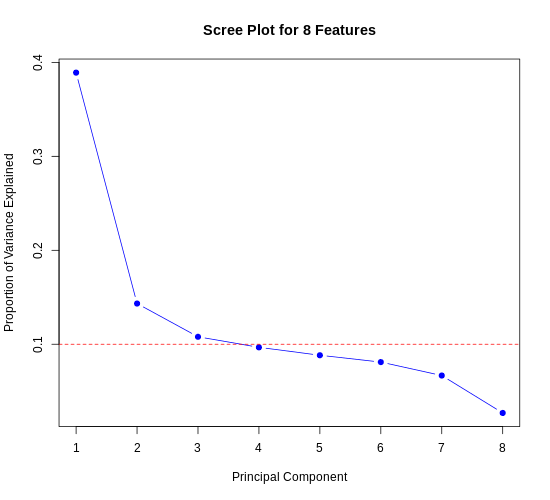

In [ ]:
%%R -h 500 -w 550 -u px
# Scree plot
plot(explained_variance, type = "b", pch = 19, col = "blue",
     xlab = "Principal Component", ylab = "Proportion of Variance Explained",
     main = "Scree Plot for 8 Features")
abline(h = 0.1, col = "red", lty = 2) # Opti

### Biplot

A biplot is a graphical representation of multivariate data that displays both the observations and the variables on the same plot. It can be used to visualize the relationships between the observations and the variables and to identify patterns and structures in the data.



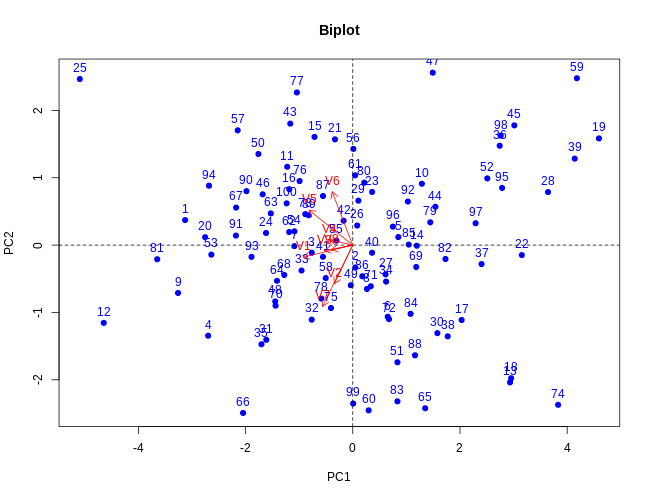

In [ ]:
%%R -h 500 -w 650 -u px
pc1 <- pc_scores[, 1]  # First principal component
pc2 <- pc_scores[, 2]  # Second principal component

# Scale eigenvectors for plotting
loadings <- eigenvectors[, 1:2] * sqrt(eigenvalues[1:2])  # Scale by sqrt of eigenvalues

# Create biplot
plot(pc1, pc2, xlab = "PC1", ylab = "PC2", main = "Biplot", pch = 19, col = "blue")
text(pc1, pc2, labels = rownames(data), pos = 3, col = "blue")  # Add sample labels
abline(h = 0, v = 0, lty = 2)  # Add reference lines

# Add arrows for loadings
arrows(0, 0, loadings[, 1], loadings[, 2], col = "red", length = 0.1)
text(loadings[, 1], loadings[, 2], labels = colnames(data), col = "red", pos = 3)

## Principal Component Analysis (PCA)  in R

Here is a **list of important R packages** that can be used to perform **Principal Component Analysis (PCA)** in R:

### 1. **Base R**

-   **Functions**: `prcomp()`, `princomp()`
-   **Description**:
    -   `prcomp()` uses Singular Value Decomposition (SVD) and is robust.
    -   `princomp()` uses eigen-decomposition of the covariance matrix.
-   **Strength**: Built-in functions, widely used, no need for external packages.

### 2. **FactoMineR**

-   **Function**: `PCA()`
-   **Description**: Provides comprehensive PCA with excellent summary outputs and visualizations.
-   **Strength**: Ideal for multivariate analysis, includes graphs and interpretation.

``` r
library(FactoMineR)
pca_result <- PCA(iris[, -5], scale.unit = TRUE, graph = TRUE)
```

### 3. **psych**

-   **Function**: `principal()`
-   **Description**: Designed for psychometric analysis. Allows control over rotations such as "varimax" and "none".
-   **Strength**: Suitable for dimensionality reduction and factor analysis in psychology.

``` r
library(psych)
pca_result <- principal(iris[, -5], nfactors = 2, rotate = "none")
```

### 5. **ade4**

-   **Function**: `dudi.pca()`
-   **Description**: Offers PCA as part of multivariate analysis tools.
-   **Strength**: User-friendly implementation with visualization options.

``` r
library(ade4)
pca_result <- dudi.pca(iris[, -5], scannf = FALSE, nf = 2)
```

### Summary Table of Key Packages

| **Package** | **Primary Function(s)** | **Key Features** |
|------------------|---------------------|---------------------------------|
| Base R | `prcomp()`, `princomp()` | Built-in, robust, SVD/eigen-decomposition |
| FactoMineR | `PCA()` | Multivariate analysis with visualizations |
| psych | `principal()` | Psychometrics, factor analysis |
| ade4 | `dudi.pca()` | Simple PCA for multivariate analysis |

### Install Required R Packages

Following R packages are required to run this notebook. If any of these packages are not installed, you can install them using the code below:

In [ ]:
%%R
packages <- c('tidyverse',
              'plyr',
              'corrr',
              'ggcorrplot',
              'factoextra',
              'ade4',
              'psych',
              'FactoMineR'
		 )

In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:
 tidyverse       plyr      corrr ggcorrplot factoextra       ade4      psych 
      TRUE       TRUE       TRUE       TRUE       TRUE       TRUE       TRUE 
FactoMineR 
      TRUE 


### Load R Packages

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])# Check loaded packages


Successfully loaded packages:
 [1] "package:FactoMineR" "package:psych"      "package:ade4"      
 [4] "package:factoextra" "package:ggcorrplot" "package:corrr"     
 [7] "package:plyr"       "package:lubridate"  "package:forcats"   
[10] "package:stringr"    "package:dplyr"      "package:purrr"     
[13] "package:readr"      "package:tidyr"      "package:tibble"    
[16] "package:ggplot2"    "package:tidyverse"  "package:tools"     
[19] "package:stats"      "package:graphics"   "package:grDevices" 
[22] "package:utils"      "package:datasets"   "package:methods"   
[25] "package:base"      


### Data

In this exercise we will use following data set PCA analysis. This dataset contains time series union mean of MODIS NDVI for the dry season , 2014-2015, Bangladesh. The columns 10-21 represent the time-series  MODIS NDVI data, and the rows represent the different unions in Bangladesh.


We will use `read_csv()` function of {readr} package to import data as a **tidy** data from my github repository. The `glimpse()` function from {dplyr} package can be used to get a quick overview of the data

In [ ]:
%%R
mf<-readr::read_csv("https://github.com/zia207/r-colab/raw/main/Data/Regression_analysis/bd_boro_NDVI.csv")
glimpse(mf)

Rows: 223 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): DIVISION, DISTRICT, UPAZILA, UNION
dbl (17): UNION_ID, x, y, LONG, LAT, NDVI_305_2014, NDVI_321_2014, NDVI_337_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 223
Columns: 21
$ UNION_ID      <dbl> 10040907, 10061031, 10063613, 10065177, 10069494, 100918…
$ x             <dbl> 519852.2, 513008.6, 556755.4, 541836.9, 516049.7, 568765…
$ y             <dbl> 2439890, 2524428, 2538580, 2508902, 2527786, 2511181, 24…
$ LONG          <dbl> 90.1924, 90.1268, 90.5536, 90.4073, 90.1564, 90.6696, 90…
$ LAT           <dbl> 22.0637, 22.8275, 22.9544, 22.6868, 22.8578, 22.7065, 22…
$ DIVISION      <chr> "Barisal", "Barisal", "Barisal", "Barisal", "Barisal", "…
$ DISTRICT      <chr> "Barguna", "Barisal", "Barisal", "Barisal", "Barisal", "…
$ UPAZILA       <chr

#### Data normalization

PCA analysis with data with different scales or units may lead to a biased result. Data normalization is a technique used in data analysis to transform data into a common scale or format, which allows for easier comparison and analysis. It ensures that each attribute has the same level of contribution, preventing one variable from dominating others.

There are different methods of data normalization, but the most commonly used ones are:

Min-max normalization: This method rescales the data to a fixed range, typically between 0 and 1. It involves subtracting the minimum value of the variable from each observation and then dividing by the range (i.e., the difference between the maximum and minimum values).

Z-score normalization: This method standardizes the data by subtracting the mean from each observation and dividing by the standard deviation. This results in a new distribution with a mean of 0 and a standard deviation of 1.

Decimal scaling normalization: This method involves moving the decimal point of the values to the left or right, so that the largest absolute value is less than 1. For example, if the largest value is 500, we can divide all values by 1000, so that the largest value becomes 0.5.

First we will create a subset of the numeric variables from the dataset:

In [ ]:
%%R
df<- mf[,10:21]

In R, `scale()` is generic function whose default method centers and/or scales the columns of a numeric matrix.

In [ ]:
%%R
df_scale <- scale(df)
head(df_scale)

     NDVI_305_2014 NDVI_321_2014 NDVI_337_2014 NDVI_353_2014 NDVI_001_2105
[1,]    1.21456759    1.03544930     0.8822451    -0.1221384    -0.3213460
[2,]    0.68217333    0.79760563     0.9195826     1.4783076     1.5883790
[3,]    0.55607996    0.63357552     0.6115482     0.5609788     0.8507604
[4,]    1.30563503    1.46192761     2.0397078     1.7417957     1.4873354
[5,]    0.92034971    0.92062822     0.9569201     1.0001256     0.9720127
[6,]   -0.01834542    0.02666409    -0.0791957    -0.5417675    -0.4021809
     NDVI_017_2015 NDVI_033_2015 NDVI_049_2015 NDVI_065_2015 NDVI_081_2015
[1,]    -0.3586689   -0.48962559   -1.03929304    -1.3803747    -0.9221907
[2,]     1.4606376    1.44227757    0.96324622     0.8117134     0.8567893
[3,]     0.5130822    0.47147196    0.05218106    -0.1771985    -0.1855205
[4,]     1.2047976    0.98599894    0.89108264     0.6551356     1.0762230
[5,]     0.7973488    0.97629088    1.14365516     0.9600501     1.2094506
[6,]    -0.2733889   -0.0

#### Explore Correlation Matrix

We will compute the correlation matrix  using `cor()` function from the {corrr} package and `ggcorrplot()` can be applied then for better visualization


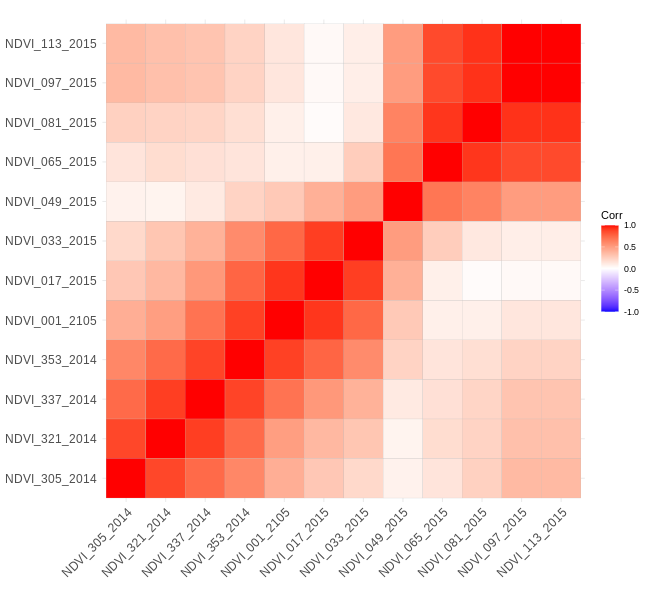

In [ ]:
%%R -w 650 -h 600 -u px

corr_matrix <- cor(df_scale)
ggcorrplot(corr_matrix)


The result of the correlation matrix can be interpreted as follow:

-   The higher the value, the most positively correlated the two variables are.

-   The closer the value to -1, the most negatively correlated they are.

### Perform PCA with {stats} package in R-base

We will use the `prcomp()` function from {statst} pcakage to produces an unrotated principal component analysis. In traditional PCA, the data is rotated to obtain these principal components. However, in unrotated PCA, the principal components are obtained without any rotation of the original data. This means that the resulting principal components are simply linear combinations of the original variables, without any adjustment for correlation or dependence between variables.

Unrotated PCA is sometimes used in situations where the goal is to obtain a simple summary of the data rather than to identify underlying factors or dimensions. It can also be used as a preliminary step before applying more complex methods of factor analysis or structural equation modeling. However, it is important to note that unrotated PCA can sometimes yield results that are difficult to interpret or that do not capture the underlying structure of the data as well as rotated PCA.

We will not use transformed data that have done before. Rather, we will set the `center` and `scale` parameters to `TRUE` to center and scale the data. `CORR` is a logical value indicating whether the calculation should use the correlation matrix or the covariance matrix. The correlation matrix can only be used if there are no constant variables.

In [ ]:
%%R
# Perform PCA on the numeric variables
pca <- princomp(mf[, -c(1:11)],
                center = TRUE,
                scale = TRUE,
                cor = TRUE )
# Print the summary of the PCA object
summary(pca)

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     2.2184639 1.8114969 1.0533509 0.53745744 0.43422551
Proportion of Variance 0.4921582 0.3281521 0.1109548 0.02888605 0.01885518
Cumulative Proportion  0.4921582 0.8203103 0.9312651 0.96015118 0.97900636
                           Comp.6      Comp.7     Comp.8      Comp.9
Standard deviation     0.31756834 0.228434736 0.19006263 0.144154561
Proportion of Variance 0.01008497 0.005218243 0.00361238 0.002078054
Cumulative Proportion  0.98909132 0.994309566 0.99792195 1.000000000
                            Comp.10
Standard deviation     1.317089e-09
Proportion of Variance 1.734723e-19
Cumulative Proportion  1.000000e+00


Based on the summary we can see that total 10 principal components have been generated (Comp.1 to Comp.12), which also correspond to the number of variables in the data.Each component explains a percentage of the total variance in the data set. In the Cumulative Proportion section, the first principal component explains almost only 47% of the total variance. The cumulative proportion from Comp.1 to Comp.4 explains nearly 94% of the total variance. This means that the these 4 components can accurately represent the data.


#### Loading

The loading of each PC represents the contribution of each original variable to that PC. In other words, the loading of a PC tells you how much each original variable "weighs" in that PC. The higher the loading of a variable on a PC, the more important that variable is in explaining the variation in that PC. Loadings are typically expressed as coefficients or weights, and they can be positive or negative.

Overall, the loading of PCA is an important concept because it helps us to understand which variables are most important in explaining the variation in the data, and how the PCs are constructed from the original variables.

In [ ]:
%%R
pca$loadings[, 1:4]

                 Comp.1     Comp.2      Comp.3      Comp.4
NDVI_337_2014 0.2882126  0.2353856  0.53519081  0.38008392
NDVI_353_2014 0.3161446  0.3261931  0.31331450  0.22942899
NDVI_001_2105 0.3024536  0.3820128  0.05382333 -0.20391208
NDVI_017_2015 0.2828175  0.3919027 -0.23927853 -0.22396535
NDVI_033_2015 0.2880179  0.3002068 -0.42525940 -0.32575710
NDVI_049_2015 0.3166130 -0.1099282 -0.52997729  0.69488491
NDVI_065_2015 0.3382228 -0.3210925 -0.14710472 -0.03331547
NDVI_081_2015 0.3383687 -0.3457584  0.02735286 -0.01171921
NDVI_097_2015 0.3416402 -0.3269652  0.18860566 -0.24589422
NDVI_113_2015 0.3416402 -0.3269652  0.18860566 -0.24589422


The loading matrix shows that the first principal component has high positive values for all metals.

#### Scores

In [ ]:
%%R
scores.ndvi<-as.data.frame(pca$scores[,1:3])
names(scores.ndvi)[1] <- "PC1_ndvi"
names(scores.ndvi)[2] <- "PC2_ndvi"
names(scores.ndvi)[3] <- "PC3_ndvi"
scores.ndvi<-cbind(ID=mf$UNION_ID,scores.ndvi)
head(scores.ndvi)
#write_csv(scores.ndvi, "pc_scores_modis_ndvi.csv")

        ID   PC1_ndvi   PC2_ndvi    PC3_ndvi
1 10040907 -1.7957492 1.17219411  1.13280448
2 10061031  3.3429252 1.24443781 -0.29469733
3 10063613  0.7910106 1.10890772  0.22140183
4 10065177  3.7930135 1.03321202  0.86096059
5 10069494  3.1309796 0.06840887 -0.09193225
6 10091887 -1.2825445 0.29709883 -0.11881581


#### Visualization of the principal components

##### Scree Plot

`screeplot()` function from {stats} package plots the variances against the number of the principal component.


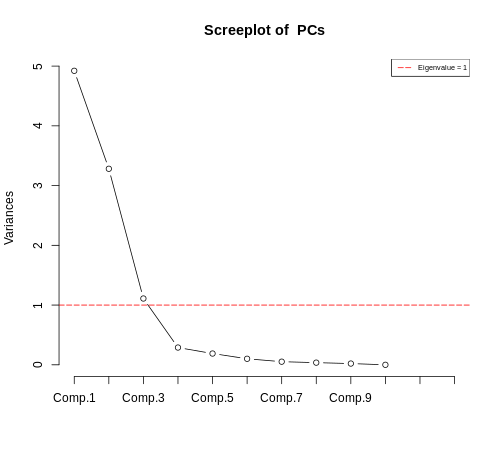

In [ ]:
%%R -w 500 -h 450 -u px
screeplot(pca, type = "l", npcs = 12, main = "Screeplot of  PCs")
abline(h = 1, col="red", lty=5)
legend("topright", legend=c("Eigenvalue = 1"),
       col=c("red"), lty=5, cex=0.6)

The screen plot shows the eigenvalues in a downward curve, from highest to lowest. The first 3 components can be considered to be the most significant since they contain almost 90% of the total information of the data and Eigenvalues greater than 1.1  The scree plot is a useful tool for determining the optimal number of principal components to retain in a PCA analysis. Typically, the goal is to retain enough principal components to explain a high percentage of the variance in the data while minimizing the number of components retained.

You can extract scores and save them for further analysis

##### Biplot of the attributes

A biplot is a graphical representation of multivariate data that displays both the observations and the variables on the same plot. It can be used to visualize the relationships between the observations and the variables and to identify patterns and structures in the data.

we will use `fviz_pca_biplot()` function from {factoextra} package



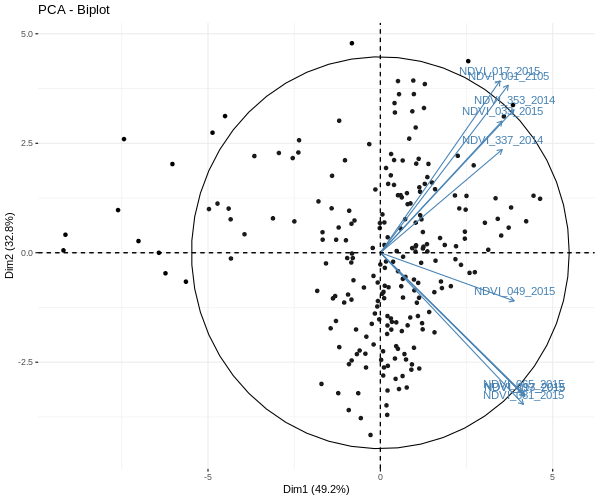

In [ ]:
%%R -h 500 -w 600 -u px
#library(factoextra)
fviz_pca_biplot(pca, label = "var", axes = 1:2, addEllipses=TRUE, llipse.level=0.95)

##### Contribution of each variable on the most important components

The goal of the third visualization is to determine how much each variable is represented in a given component. Such a quality of representation is called the Cos2 and corresponds to the square cosine, and it is computed using the `fviz_cos2()` of {factoextra} package. This function can be used to visualize the quality of representation (cos2) of rows/columns from the results of Principal Component Analysis (PCA).

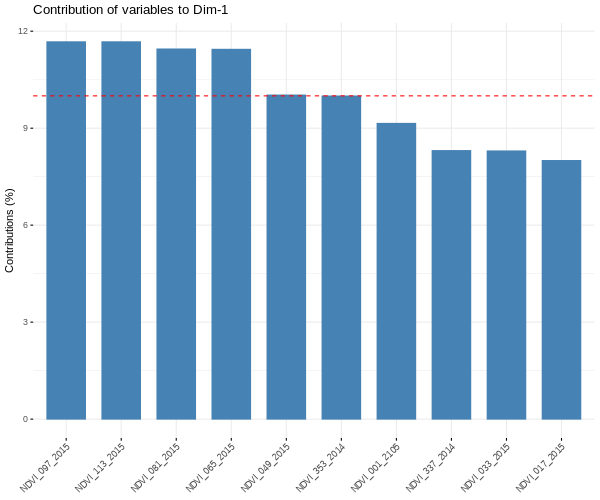

In [ ]:
%%R -h 500 -w 600 -u px
#library(factoextra)
# Contributions of variables to PC1
factoextra::fviz_contrib(pca, choice = "var", axes = 1, top = 10)


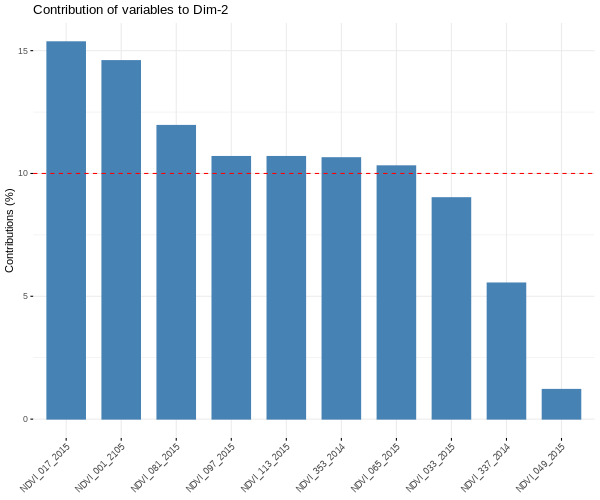

In [ ]:
%%R -h 500 -w 600 -u px
#library(factoextra)
# Contributions of variables to PC2
factoextra::fviz_contrib(pca, choice = "var", axes = 2, top = 10)

A low value means that the variable is not perfectly represented by that component. A high value, on the other hand, means a good representation of the variable on that component.

We can also plot the results of the PCA using the biplot function, which shows both the loadings of each variable on the principal components and the scores of each observation on the principal components. We will use `fviz_pca_var()` of {factoextra} package.

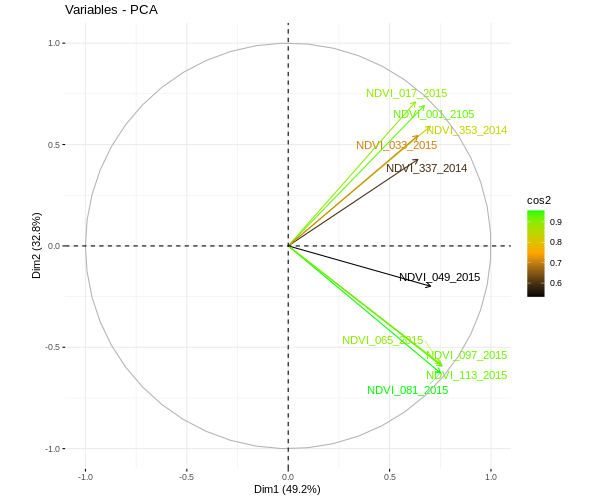

In [ ]:
%%R -w 600 -h 500 -u px
fviz_pca_var(pca, col.var = "cos2",
            gradient.cols = c("black", "orange", "green"),
            repel = TRUE)

Note that there are many additional options that can be specified in the `prcomp` function, such as the number of principal components to extract, the method for calculating the covariance matrix, and more. For more information, see the help documentation for the `prcomp()` function in R.

### PCA with {FactoMineR} package

The `PCA()` function from {FactoMineR} package is used to perform a principal component analysis (PCA) on a dataset with supplementary individuals, supplementary quantitative variables and supplementary categorical variables. Missing values are replaced by the column mean.

The `PCA()` function takes a data frame as input and returns an object of class PCA, which contains the results of the PCA analysis.

In [ ]:
%%R
# Perform PCA on the numeric variables
res.pca_01 <-FactoMineR::PCA(mf[,10:21],
               ncp = 6,
               graph = FALSE,
               scale.unit = TRUE)

# Print the summary of the PCA object
summary(res.pca_01)


Call:
FactoMineR::PCA(X = mf[, 10:21], scale.unit = TRUE, ncp = 6,  
     graph = FALSE) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6   Dim.7
Variance               5.671   3.409   1.780   0.427   0.262   0.225   0.085
% of var.             47.256  28.412  14.834   3.558   2.180   1.877   0.706
Cumulative % of var.  47.256  75.667  90.501  94.060  96.240  98.117  98.823
                       Dim.8   Dim.9  Dim.10  Dim.11  Dim.12
Variance               0.052   0.036   0.034   0.019   0.000
% of var.              0.435   0.299   0.281   0.162   0.000
Cumulative % of var.  99.257  99.557  99.838 100.000 100.000

Individuals (the 10 first)
                  Dist    Dim.1    ctr   cos2    Dim.2    ctr   cos2    Dim.3
1             |  3.005 | -0.737  0.043  0.060 | -1.888  0.469  0.395 | -2.056
2             |  3.745 |  3.554  0.999  0.900 | -0.670  0.059  0.032 |  0.916
3             |  1.640 |  1.198  0.113  0.533 | -1.073  0.151  0.428 | -0.146
4  

#### Describe the dimensions

The `dimdesc()` function from {FactoMineR} package can be used to describe the dimensions of the PCA results. This function takes the PCA object as input and returns a data frame with the description of the dimensions.

In [ ]:
%%R
dimdesc(res.pca_01, axes = 1:2)

$Dim.1

Link between the variable and the continuous variables (R-square)
              correlation      p.value
NDVI_353_2014   0.8132747 7.017952e-54
NDVI_337_2014   0.7937176 1.307200e-49
NDVI_321_2014   0.7352356 3.437740e-39
NDVI_001_2105   0.7345444 4.392266e-39
NDVI_113_2015   0.6783056 2.071734e-31
NDVI_097_2015   0.6783056 2.071734e-31
NDVI_305_2014   0.6651882 7.346280e-30
NDVI_017_2015   0.6568578 6.458924e-29
NDVI_081_2015   0.6364552 1.001671e-26
NDVI_033_2015   0.6283220 6.743256e-26
NDVI_065_2015   0.6154540 1.231004e-24
NDVI_049_2015   0.5712849 1.021628e-20

$Dim.2

Link between the variable and the continuous variables (R-square)
              correlation      p.value
NDVI_081_2015   0.7407301 4.769083e-40
NDVI_065_2015   0.7165130 2.021248e-36
NDVI_113_2015   0.6876761 1.442265e-32
NDVI_097_2015   0.6876761 1.442265e-32
NDVI_049_2015   0.3751721 7.308503e-09
NDVI_305_2014  -0.2133817 1.348001e-03
NDVI_321_2014  -0.2942607 7.862461e-06
NDVI_033_2015  -0.3698635 1.2304

#### Biplot Dimension 1 and 2

We will use `fviz_pca_var()` of {factoextra} package.

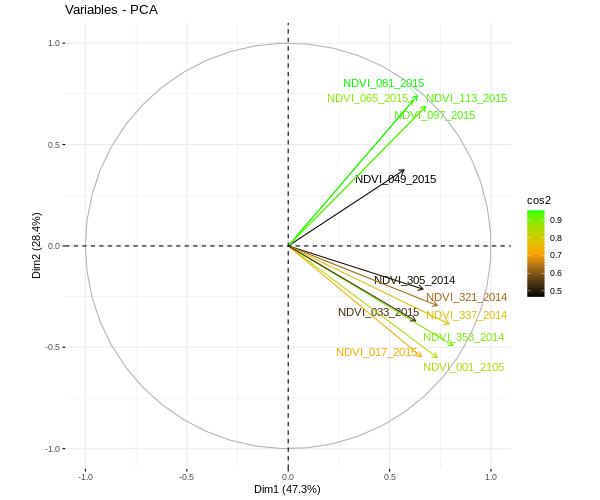

In [ ]:
%%R -w 600 -h 500 -u px
fviz_pca_var(res.pca_01, col.var = "cos2",
            gradient.cols = c("black", "orange", "green"),
            repel = TRUE)

#### PCA with supplementary variables

`PCA()`function in {FactoMineR} package allows us to use two additional arguments `uanti.sup` and `quali.sup` to specify. a vector indicating the indexes of the quantitative and categorical supplementary variables. We will use the `decathlon` dataset from the {FactoMineR} package, which contains information about decathlon athletes.

In [ ]:
%%R
data(decathlon)
glimpse(decathlon)

Rows: 41
Columns: 13
$ `100m`        <dbl> 11.04, 10.76, 11.02, 11.02, 11.34, 11.11, 11.13, 10.83, …
$ Long.jump     <dbl> 7.58, 7.40, 7.30, 7.23, 7.09, 7.60, 7.30, 7.31, 6.81, 7.…
$ Shot.put      <dbl> 14.83, 14.26, 14.77, 14.25, 15.19, 14.31, 13.48, 13.76, …
$ High.jump     <dbl> 2.07, 1.86, 2.04, 1.92, 2.10, 1.98, 2.01, 2.13, 1.95, 1.…
$ `400m`        <dbl> 49.81, 49.37, 48.37, 48.93, 50.42, 48.68, 48.62, 49.91, …
$ `110m.hurdle` <dbl> 14.69, 14.05, 14.09, 14.99, 15.31, 14.23, 14.17, 14.38, …
$ Discus        <dbl> 43.75, 50.72, 48.95, 40.87, 46.26, 41.10, 45.67, 44.41, …
$ Pole.vault    <dbl> 5.02, 4.92, 4.92, 5.32, 4.72, 4.92, 4.42, 4.42, 4.92, 4.…
$ Javeline      <dbl> 63.19, 60.15, 50.31, 62.77, 63.44, 51.77, 55.37, 56.37, …
$ `1500m`       <dbl> 291.70, 301.50, 300.20, 280.10, 276.40, 278.10, 268.00, …
$ Rank          <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1, 2, 3, 4, 5…
$ Points        <int> 8217, 8122, 8099, 8067, 8036, 8030, 8004, 7995, 7802, 77…
$ Competition   <fc

`Rank` and `Points` are quantitative supplementary variables, and `Competition` is a categorical supplementary variable. We will use these variables as supplementary variables in the PCA analysis.

In [ ]:
%%R
## PCA with supplementary variables
res.pca_02 <- PCA(decathlon,
               quanti.sup = 11:12,
               quali.sup=13,
               graph = FALSE,
               scale.unit = TRUE)
summary(res.pca_02)


Call:
PCA(X = decathlon, scale.unit = TRUE, quanti.sup = 11:12, quali.sup = 13,  
     graph = FALSE) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6   Dim.7
Variance               3.272   1.737   1.405   1.057   0.685   0.599   0.451
% of var.             32.719  17.371  14.049  10.569   6.848   5.993   4.512
Cumulative % of var.  32.719  50.090  64.140  74.708  81.556  87.548  92.061
                       Dim.8   Dim.9  Dim.10
Variance               0.397   0.215   0.182
% of var.              3.969   2.148   1.822
Cumulative % of var.  96.030  98.178 100.000

Individuals (the 10 first)
                Dist    Dim.1    ctr   cos2    Dim.2    ctr   cos2    Dim.3
SEBRLE      |  2.369 |  0.792  0.467  0.112 |  0.772  0.836  0.106 |  0.827
CLAY        |  3.507 |  1.235  1.137  0.124 |  0.575  0.464  0.027 |  2.141
KARPOV      |  3.396 |  1.358  1.375  0.160 |  0.484  0.329  0.020 |  1.956
BERNARD     |  2.763 | -0.610  0.277  0.049 | -0.875  1.074  0

#### Barplot of the eigenvalues

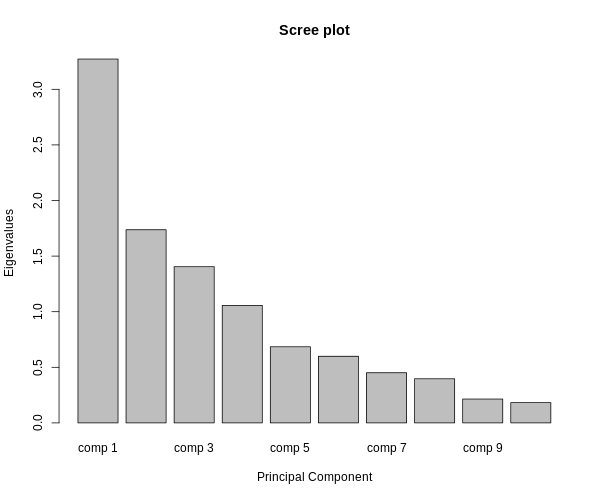

In [ ]:
%%R -w 600 -h 500 -u px
barplot(res.pca_02$eig[, 1],
        xlab = "Principal Component",
        ylab = "Eigenvalues",
        main = "Scree plot")

#### Biplot of the attributes

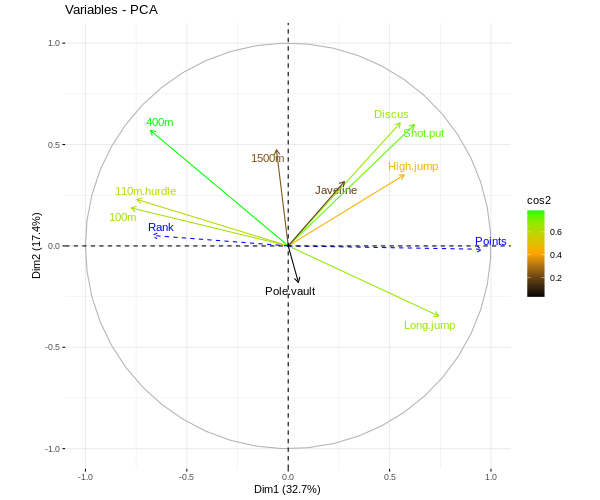

In [ ]:
%%R -w 600 -h 500 -u px
fviz_pca_var(res.pca_02, col.var = "cos2",
            gradient.cols = c("black", "orange", "green"),
            repel = TRUE)

### PCA with {psych} package

#### Unrotated PCA

The `principal()` function from {psych} package is used to perform a principal component analysis (PCA) on a dataset. The `principal()` function takes a data frame as input and returns an object of class principal, which contains the results of the PCA analysis. For unrotated PCA, the `rotate` parameter is set to `none`.

In [ ]:
%%R
#| warning: false
pc.unrotate <- principal(mf[,10:21],
                nfactors = 4,
                scores = TRUE,
                cor = TRUE,
                rotate="none")
pc.unrotate

Principal Components Analysis
Call: principal(r = mf[, 10:21], nfactors = 4, rotate = "none", scores = TRUE, 
    cor = TRUE)
Standardized loadings (pattern matrix) based upon correlation matrix
               PC1   PC2   PC3   PC4   h2    u2 com
NDVI_305_2014 0.67 -0.21 -0.57  0.31 0.91 0.089 2.6
NDVI_321_2014 0.74 -0.29 -0.54  0.18 0.95 0.047 2.4
NDVI_337_2014 0.79 -0.39 -0.37 -0.06 0.92 0.077 1.9
NDVI_353_2014 0.81 -0.49 -0.06 -0.17 0.93 0.065 1.8
NDVI_001_2105 0.73 -0.55  0.25 -0.25 0.96 0.036 2.4
NDVI_017_2015 0.66 -0.55  0.48 -0.05 0.97 0.034 2.8
NDVI_033_2015 0.63 -0.37  0.59  0.13 0.90 0.104 2.7
NDVI_049_2015 0.57  0.38  0.55  0.37 0.91 0.092 3.5
NDVI_065_2015 0.62  0.72  0.18  0.03 0.92 0.075 2.1
NDVI_081_2015 0.64  0.74  0.02 -0.06 0.96 0.042 2.0
NDVI_097_2015 0.68  0.69 -0.13 -0.15 0.97 0.025 2.2
NDVI_113_2015 0.68  0.69 -0.13 -0.15 0.97 0.025 2.2

                       PC1  PC2  PC3  PC4
SS loadings           5.67 3.41 1.78 0.43
Proportion Var        0.47 0.28 0.15 0.04
Cu

##### Plot the successive eigen values for a scree test

Cattell's scree test is one of most simple ways of testing the number of components or factors in a correlation matrix. We will use `scree()` function from {psych} package to plot the successive eigen values for a scree test.

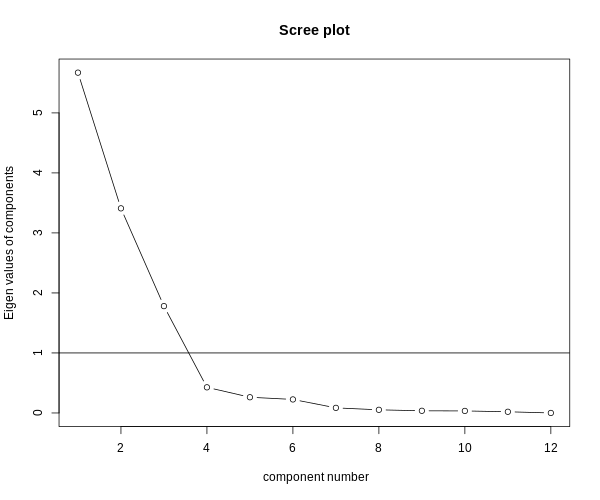

In [ ]:
%%R -w 600 -h 500 -u px
VSS.scree(mf[,10:21], main = "Scree plot",sqrt=FALSE)

##### Variance Explained

In [ ]:
%%R
round(pc.unrotate$Vaccounted,2)

                       PC1  PC2  PC3  PC4
SS loadings           5.67 3.41 1.78 0.43
Proportion Var        0.47 0.28 0.15 0.04
Cumulative Var        0.47 0.76 0.91 0.94
Proportion Explained  0.50 0.30 0.16 0.04
Cumulative Proportion 0.50 0.80 0.96 1.00


##### Loadings

In [ ]:
%%R
pc.unrotate$loadings


Loadings:
              PC1    PC2    PC3    PC4   
NDVI_305_2014  0.665 -0.213 -0.574  0.306
NDVI_321_2014  0.735 -0.294 -0.540  0.185
NDVI_337_2014  0.794 -0.385 -0.374       
NDVI_353_2014  0.813 -0.491        -0.168
NDVI_001_2105  0.735 -0.551  0.247 -0.246
NDVI_017_2015  0.657 -0.547  0.484       
NDVI_033_2015  0.628 -0.370  0.589  0.129
NDVI_049_2015  0.571  0.375  0.553  0.367
NDVI_065_2015  0.615  0.717  0.179       
NDVI_081_2015  0.636  0.741              
NDVI_097_2015  0.678  0.688 -0.133 -0.154
NDVI_113_2015  0.678  0.688 -0.133 -0.154

                 PC1   PC2   PC3   PC4
SS loadings    5.671 3.409 1.780 0.427
Proportion Var 0.473 0.284 0.148 0.036
Cumulative Var 0.473 0.757 0.905 0.941


##### Scores

In [ ]:
%%R
scores<-pc.unrotate$scores
head(scores)

           PC1        PC2        PC3          PC4
[1,] -1.750734 -3.4786638 -2.7372830  0.449056195
[2,]  8.443113 -1.2348940  1.2194824 -0.092199600
[3,]  2.845352 -1.9772286 -0.1944534  0.005910178
[4,] 10.476330 -1.1758741 -0.5226852 -0.087600924
[5,]  7.988355  0.6318846  0.3328422  0.156798821
[6,] -2.667820 -1.0152515 -0.3471418  0.274333939


##### Biplot


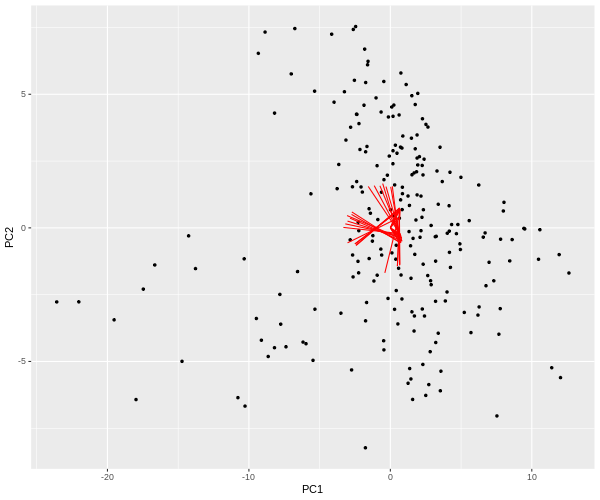

In [ ]:
%%R -w 600 -h 500 -u px
# Extract Score and Loadings
scores <- as.data.frame(pc.unrotate$scores)
loadings <-(pc.unrotate$loadings)
PC1<-as.data.frame(loadings[1:12])
PC2<-as.data.frame(loadings[13:24])
PC3<-as.data.frame(loadings[25:36])
PC4<-as.data.frame(loadings[37:48])
loading.df<-cbind(PC1,PC2,PC3,PC4)
# rename columns
colnames(loading.df)<-c("PC1","PC2","PC3","PC4")
# make biplot
p = ggplot()+
    geom_point(data = scores, aes(x=PC1, y=PC2),size = 1, shape = 19)+
   geom_segment(
                    data = loading.df, aes(
                              x = 0, y = 0,
                              xend = PC1, yend = PC2
                    ),
                    arrow = arrow(length = unit(2, "cm"), type = "open", angle = 25),
                    size = 0.5, color = "red"
          )
p

#### Rotated PCA

**Rotation in PCA** is a post-processing step applied to the **loading matrix** (the matrix of variable-to-component correlations) to make the **interpretation of principal components (PCs)** easier. While PCA itself produces orthogonal components, rotation rearranges the loading structure to clarify which variables contribute most to each component.

***Why Rotation is Used in PCA***

1.  **Simplify Interpretation**:
    -   Rotated solutions make it easier to identify meaningful patterns in the data.
    -   Variables are often grouped more distinctly under specific components.
2.  **Reduce Cross-Loadings**:
    -   Rotation minimizes the number of components that strongly load on a single variable or the number of variables that contribute to each component.
3.  **Enhance Relevance**:
    -   Especially in exploratory data analysis, rotation helps match the components with theoretical constructs or clusters of variables.

***Types of Rotations in PCA***

1.  **Loadings Matrix**:
    -   In PCA, each variable has a "loading" on each component. A higher loading indicates a stronger relationship between the variable and the component.
2.  **Orthogonal Rotation**:
    -   Preserves the independence (orthogonality) of the components.
    -   Examples: **Varimax**, **Quartimax**.
3.  **Oblique Rotation**:
    -   Allows components to be correlated.
    -   Examples: **Promax**, **Oblimin**.
4.  **Geometric Perspective**:
    -   Think of rotation as physically rotating the axes (principal components) in the multidimensional variable space to align them better with the clusters of data points.

***How Rotation Works in PCA***

1.  **Start with PCA Output**:
    -   Perform PCA to extract components and loadings.
2.  **Rotate the Loadings Matrix**:
    -   Rotation alters the loadings matrix while keeping the total explained variance constant.
    -   The rotation redistributes the variance among the components without changing the total.
3.  **New Interpretation**:
    -   The rotated components may now better align with distinct clusters of variables.

The `principal()` function takes a data frame as input and returns an object of class principal, which contains the results of the PCA analysis. For rotated PCA, the `rotate` parameter is set to `varimax` or `promax`.

In [ ]:
%%R
#| warning: false
pc.rotate <- principal(mf[,10:21],
                nfactors = 4,
                scores = TRUE,
                cor = TRUE,
                rotate="varimax")
pc.rotate

Principal Components Analysis
Call: principal(r = mf[, 10:21], nfactors = 4, rotate = "varimax", 
    scores = TRUE, cor = TRUE)
Standardized loadings (pattern matrix) based upon correlation matrix
                RC2  RC3   RC1   RC4   h2    u2 com
NDVI_305_2014  0.14 0.10  0.94  0.09 0.91 0.089 1.1
NDVI_321_2014  0.14 0.23  0.94 -0.01 0.95 0.047 1.2
NDVI_337_2014  0.15 0.47  0.81 -0.17 0.92 0.077 1.8
NDVI_353_2014  0.11 0.74  0.59 -0.15 0.93 0.065 2.1
NDVI_001_2105  0.04 0.92  0.33 -0.11 0.96 0.036 1.3
NDVI_017_2015 -0.03 0.96  0.17  0.15 0.97 0.034 1.1
NDVI_033_2015  0.07 0.86  0.08  0.37 0.90 0.104 1.4
NDVI_049_2015  0.58 0.36 -0.08  0.66 0.91 0.092 2.6
NDVI_065_2015  0.92 0.09  0.00  0.25 0.92 0.075 1.2
NDVI_081_2015  0.97 0.02  0.10  0.11 0.96 0.042 1.0
NDVI_097_2015  0.96 0.01  0.22 -0.04 0.97 0.025 1.1
NDVI_113_2015  0.96 0.01  0.22 -0.04 0.97 0.025 1.1

                       RC2  RC3  RC1  RC4
SS loadings           4.06 3.47 3.01 0.75
Proportion Var        0.34 0.29 0.25 0.06

### PCA with {ade4} package

The `dudi.pca()` function from {ade4} package is used to perform a principal component analysis (PCA) on a dataset. The `dudi.pca()` function takes a data frame as input and returns an object of class dudi, which contains the results of the PCA analysis.

In [ ]:
%%R
pca.dudi <- dudi.pca(mf[,10:21], center = TRUE, scale = TRUE, scan = FALSE)
pca.dudi

Duality diagramm
class: pca dudi
$call: dudi.pca(df = mf[, 10:21], center = TRUE, scale = TRUE, scannf = FALSE)

$nf: 2 axis-components saved
$rank: 11
eigen values: 5.671 3.409 1.78 0.427 0.2616 ...
  vector length mode    content       
1 $cw    12     numeric column weights
2 $lw    223    numeric row weights   
3 $eig   11     numeric eigen values  

  data.frame nrow ncol content             
1 $tab       223  12   modified array      
2 $li        223  2    row coordinates     
3 $l1        223  2    row normed scores   
4 $co        12   2    column coordinates  
5 $c1        12   2    column normed scores
other elements: cent norm 


#### Eigenvalues

In [ ]:
%%R -w 600 -h 500 -u px
pca.dudi$eig

 [1] 5.67067840 3.40942081 1.78007991 0.42699159 0.26161236 0.22520696
 [7] 0.08473906 0.05215039 0.03591024 0.03372869 0.01948158


#### Screen Plot

The function `screeplot()` represents the amount of inertia (usually variance) associated to each dimension.

In [ ]:
%%R -w 600 -h 500 -u px
screeplot(pca.dudi)

#### Biplot


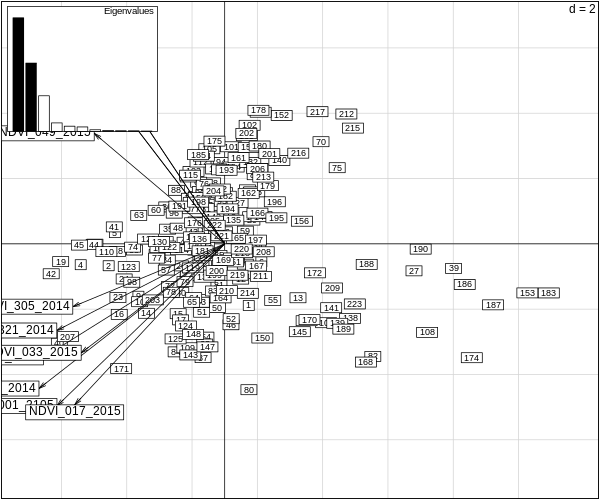

In [ ]:
%%R -w 600 -h 500 -u px
biplot(pca.dudi, cex = 0.7)

## Summary and Conclusion

Principal Component Analysis (PCA) is a powerful technique for dimensionality reduction and data visualization. It allows us to identify the underlying structure in high-dimensional data by transforming the original variables into a new set of uncorrelated variables called principal components. These principal components capture the most important patterns in the data and can be used to reduce the dimensionality of the dataset while preserving most of the variance. This tutorial demonstrated how to perform PCA in R using the base R functions, as well as the {FactoMineR}, {psych}, and {ade4} packages. We explored the key steps involved in PCA, including data normalization, computing the covariance matrix, solving the eigenvalue problem, projecting the data onto principal components, and visualizing the results. We also discussed the importance of interpreting the principal components, analyzing the loading matrix, and understanding the contribution of each variable to the principal components. By following these steps and using the appropriate R packages, you can gain valuable insights from your data and uncover hidden patterns that may not be apparent from the original dataset.





## References

1.  [Principal Component Analysis (PCA): A Step-by-Step Explanation](https://builtin.com/data-science/step-step-explanation-principal-component-analysis)

2.  [Chapter 18 Principal Component Analysis](https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch18.pdf)

3.  [Principal Component Analysis in R Tutorial](https://www.datacamp.com/tutorial/pca-analysis-r)

4.  [Principal Components Analysis in R: Step-by-Step Example](https://www.statology.org/principal-components-analysis-in-r/)

